
### Krishna Kumar Singh


### Data Set used in Q-1: Molecular Biology (Splice-junction Gene Sequences) Data Set

## Q1. (i)  Answer the following questions about the data.
## 1)  What the data is about?
Ans- Data Set Information:

Title of Database: Primate splice-junction gene sequences (DNA) with associated imperfect domain theory.

This dataset consists of DNA sequences from primate species and is used to predict whether a given position in a DNA sequence corresponds to an exon-intron or intron-exon boundary. The task involves recognizing the boundaries between exons and introns, which are important for understanding the process of protein creation in higher organisms.

The dataset includes a window of 60 nucleotides, and the task is to determine whether the position in the middle of the window corresponds to an intron-exon or exon-intron boundary. The possible predictions are "intron -> exon" boundary (ie), "exon -> intron" boundary (ei), or neither. The dataset includes imperfect domain theory, which is a set of rules for recognizing exon-intron boundaries based on features of the DNA sequence.

This dataset can be useful for developing algorithms that can accurately predict exon-intron boundaries in DNA sequences, which is important for understanding the gene splicing process and for identifying genetic variations that may contribute to disease.

THE PREDICTION:

Given a position in the middle of a window 60 DNA sequence elements (called "nucleotides" or "base-pairs"), decide if this is a

	a) "intron -> exon" boundary (ie) [These are sometimes called "donors"]
    
	b) "exon -> intron" boundary (ei) [These are sometimes called "acceptors"]
    
	c) neither 



 importing libraries

In [57]:
#import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
#loading the data
url="https://archive.ics.uci.edu/ml/machine-learning-databases/molecular-biology/splice-junction-gene-sequences/splice.data"
colnames=list(range(3))
df = pd.read_csv(url,encoding = 'utf8',names=colnames, header=None)
X = df.values[:,2]
Y = df.values[:,0]
missing_data =  [[i[0],i[1]] for i in zip(X,Y) if (('D' in i[0]) or ('N' in i[0]) or ('S' in i[0]) or ('R' in i[0]))]
data = [[i[0],i[1]] for i in zip(X,Y) if (('D' not in i[0]) and ('N' not in i[0]) and ('S' not in i[0]) and ('R' not in i[0]))]






In [59]:
#Analysising Missing values
perc_missing = round((len(missing_data)*100)/len(X),2)
print("percentage of data missing = ",perc_missing," %")


percentage of data missing =  0.47  %


As the proportion of data missing is very less, we are neglected the missing data instances.

In [60]:
#Updating the dataframe

X = np.array(data)[:,0]
Y = np.array(data)[:,1]
X = [[j for j in (i.lstrip())] for i in X]
print("Number of instances in data = ", len(X))
print("Number of features in each data = ",len(X[0]))
df = pd.DataFrame(X)
df['class'] = Y
lables = df['class'].unique()
print("Unique classes in data = ",lables)
print("Number of classes = ", len(lables))
print()
print("First five instances of dataframe:")
df.head()

Number of instances in data =  3175
Number of features in each data =  60
Unique classes in data =  ['EI' 'IE' 'N']
Number of classes =  3

First five instances of dataframe:


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,class
0,C,C,A,G,C,T,G,C,A,T,...,G,C,C,A,G,T,C,T,G,EI
1,A,G,A,C,C,C,G,C,C,G,...,T,G,C,C,C,C,C,G,C,EI
2,G,A,G,G,T,G,A,A,G,G,...,A,C,G,G,G,G,A,T,G,EI
3,G,G,G,C,T,G,C,G,T,T,...,G,T,T,T,T,C,C,C,C,EI
4,G,C,T,C,A,G,C,C,C,C,...,C,T,T,G,A,C,C,C,T,EI


In [61]:
# Checking for duplicates
print("The number of duplicate rows are ", df.duplicated().sum())

# Removing the duplicates rows
df.drop_duplicates(inplace = True)
print("The number of rows after removing duplicates are ", len(df))



The number of duplicate rows are  184
The number of rows after removing duplicates are  2991


In [15]:
# Updating X and Y
X = df.values[:,0:-1]
Y  = df.values[:,-1]
print(X[0:5])
print(Y[0:5])

[['C' 'C' 'A' 'G' 'C' 'T' 'G' 'C' 'A' 'T' 'C' 'A' 'C' 'A' 'G' 'G' 'A' 'G'
  'G' 'C' 'C' 'A' 'G' 'C' 'G' 'A' 'G' 'C' 'A' 'G' 'G' 'T' 'C' 'T' 'G' 'T'
  'T' 'C' 'C' 'A' 'A' 'G' 'G' 'G' 'C' 'C' 'T' 'T' 'C' 'G' 'A' 'G' 'C' 'C'
  'A' 'G' 'T' 'C' 'T' 'G']
 ['A' 'G' 'A' 'C' 'C' 'C' 'G' 'C' 'C' 'G' 'G' 'G' 'A' 'G' 'G' 'C' 'G' 'G'
  'A' 'G' 'G' 'A' 'C' 'C' 'T' 'G' 'C' 'A' 'G' 'G' 'G' 'T' 'G' 'A' 'G' 'C'
  'C' 'C' 'C' 'A' 'C' 'C' 'G' 'C' 'C' 'C' 'C' 'T' 'C' 'C' 'G' 'T' 'G' 'C'
  'C' 'C' 'C' 'C' 'G' 'C']
 ['G' 'A' 'G' 'G' 'T' 'G' 'A' 'A' 'G' 'G' 'A' 'C' 'G' 'T' 'C' 'C' 'T' 'T'
  'C' 'C' 'C' 'C' 'A' 'G' 'G' 'A' 'G' 'C' 'C' 'G' 'G' 'T' 'G' 'A' 'G' 'A'
  'A' 'G' 'C' 'G' 'C' 'A' 'G' 'T' 'C' 'G' 'G' 'G' 'G' 'G' 'C' 'A' 'C' 'G'
  'G' 'G' 'G' 'A' 'T' 'G']
 ['G' 'G' 'G' 'C' 'T' 'G' 'C' 'G' 'T' 'T' 'G' 'C' 'T' 'G' 'G' 'T' 'C' 'A'
  'C' 'A' 'T' 'T' 'C' 'C' 'T' 'G' 'G' 'C' 'A' 'G' 'G' 'T' 'A' 'T' 'G' 'G'
  'G' 'G' 'C' 'G' 'G' 'G' 'G' 'C' 'T' 'T' 'G' 'C' 'T' 'C' 'G' 'G' 'T' 'T'
  'T' 'T' 'C' 'C' 'C' 'C']
 ['G

In [62]:
print(df.describe(include='all'))
# Checking if there are missing values
print(df.isnull().sum())
print(df.info())

           0     1     2     3     4     5     6     7     8     9  ...    51  \
count   2991  2991  2991  2991  2991  2991  2991  2991  2991  2991  ...  2991   
unique     4     4     4     4     4     4     4     4     4     4  ...     4   
top        G     C     C     C     C     C     C     C     C     T  ...     G   
freq     821   795   817   816   803   842   804   820   837   784  ...   826   

          52    53    54    55    56    57    58    59 class  
count   2991  2991  2991  2991  2991  2991  2991  2991  2991  
unique     4     4     4     4     4     4     4     4     3  
top        G     G     G     G     G     G     C     G     N  
freq     809   864   811   779   853   808   806   875  1647  

[4 rows x 61 columns]
0        0
1        0
2        0
3        0
4        0
        ..
56       0
57       0
58       0
59       0
class    0
Length: 61, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2991 entries, 0 to 3174
Data columns (total 61 columns):
 # 

There are no missing values present in this updated dataset.

## Data Visualization

['EI' 'IE' 'N'] [ 762  765 1648]
3175


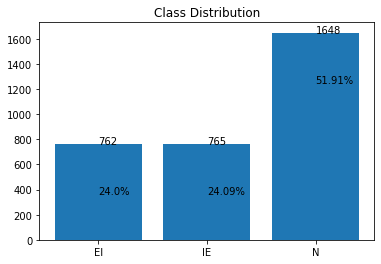

In [63]:

ele, cnts = np.unique(Y,return_counts=True)
print(ele,cnts)
plt.bar(ele,cnts)
totcnts = np.sum(cnts)
print(totcnts)
plt.title("Class Distribution")
for index, value in enumerate(cnts):
    plt.text(index, value,
             value)
    plt.text(index,value-400,str(round((value*100)/totcnts,2))+'%')
plt.show()

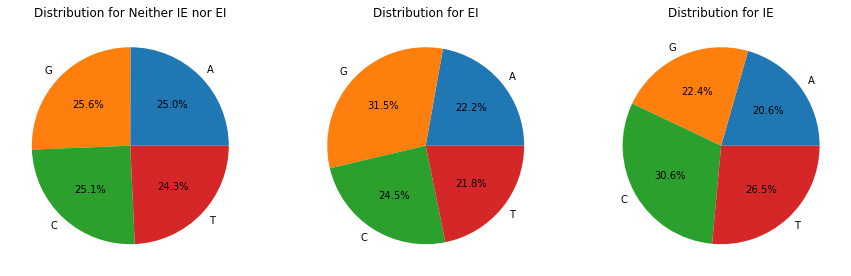

In [64]:
def cntf(arr,ele):
    ct =0
    for ch in arr:
        if ch==ele:
            ct+=1
    return ct
ct_arr = [[0,0,0,0],[0,0,0,0],[0,0,0,0]]
for i in range(len(Y)):
    if Y[i]=='N':
        ct_arr[0][0] += cntf(X[i],'A')
        ct_arr[0][1] += cntf(X[i],'G')
        ct_arr[0][2] += cntf(X[i],'C')
        ct_arr[0][3] += cntf(X[i],'T')
    if Y[i]=='EI':
        ct_arr[1][0] += cntf(X[i],'A')
        ct_arr[1][1] += cntf(X[i],'G')
        ct_arr[1][2] += cntf(X[i],'C')
        ct_arr[1][3] += cntf(X[i],'T')
    if Y[i]=='IE':
        ct_arr[2][0] += cntf(X[i],'A')
        ct_arr[2][1] += cntf(X[i],'G')
        ct_arr[2][2] += cntf(X[i],'C')
        ct_arr[2][3] += cntf(X[i],'T')
ele_labels = ['A','G','C','T']
fig,ax = plt.subplots(1,3,figsize=(15,15))
ax[0].pie(ct_arr[0],labels=ele_labels,autopct='%1.1f%%')
ax[0].set_title("Distribution for Neither IE nor EI")
ax[1].pie(ct_arr[1],labels=ele_labels,autopct='%1.1f%%')
ax[1].set_title("Distribution for EI")
ax[2].pie(ct_arr[2],labels=ele_labels,autopct='%1.1f%%')
ax[2].set_title("Distribution for IE")
plt.show()
        



## 2) What type of benefit you might hope to get from data mining?

Ans-:
1. Identifying patterns and relationships: Data mining techniques can help identify patterns and relationships between different features in the dataset that may not be immediately apparent. This can lead to new insights and discoveries in molecular biology.

2. Developing predictive models: By analyzing the data, data mining techniques can help develop predictive models that can be used to identify splice junctions in new DNA sequences. This can be particularly useful in identifying potential disease-causing mutations or developing new treatments.

3. Improving classification accuracy: Data mining can help improve the accuracy of classification algorithms used to identify splice junctions. This can help reduce false positives and false negatives, which can improve the overall accuracy of the classification model.

4. Accelerating research: Data mining can help accelerate research by automating the analysis of large amounts of data. This can save time and resources, allowing researchers to focus on other aspects of their research.


## 3) Discuss data quality issues

(i) Unstructured data
Many times, if data has not been entered correctly in the system, or some files may have been corrupted, the remaining data has many missing variables.

(ii) Duplicate data
Multiple copies of the same records take a toll on computing and storing, but may also produce skewed or incorrect insights when undetected. One of the critical problems could be human error — someone simply entering data multiple
times by accident — or an algorithm that went wrong.

(iii) Inaccurate data
Inaccurate data is data in systems filled with human mistakes, like a type or wrong information provided by the customer or inputting details in the wrong field.

#### a) Are there problems with the data?

Ans- The Primate splice-junction gene sequences (DNA) dataset has no duplicate or missing values, and the data is accurate and from a trusted source, thus there are no issues with the data.

#### b) What might be an appropriate response to the quality issues.

Ans- To overcome data quality issue,we do the following:

For Unstructured Data:
Data integration tool help in converting unstructured data to structured data. And also, move data from various formats into one consistent form.

For Duplicate Data:
Data deduplication is a combination of human intuition, data analysis, and algorithms to detect possible duplicates based on chance scores and common sense to determine where records look like a near match.

For Inaccurate Data:
Automation tools to reduce the amount of manual work when moving data between systems is useful in reducing the risk of mistakes by tired or bored workers.

 ### Q1. (ii):- Implement (1) Decision Tree, (2) Random Forest, (3) Naïve Bayes Classifier and (4) KNN classifier, (5) SVM, and (6) ANN and compare the performances using kfold cross validation and other tuning techniques ( grid search and parameter search, where ever applicable) 

## 1.1. Decision Tree

In [65]:
#import the necessary packages
#Evaluation Metrics
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score,confusion_matrix,classification_report
#Model Select
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing,metrics
from sklearn.pipeline import make_pipeline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
# Encoding the categorical data

# Encoding X
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[i for i in range(60)])],remainder="passthrough")
X = ct.fit_transform(X)

# Encoding Y
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

In [67]:
#Splitting the data into test set and train set
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=100)

### 1.1.1. Decision Tree - Hyperparameteric Tuning 

In [22]:
from sklearn.model_selection import GridSearchCV

criterion = ["gini", "entropy"] 
max_leaf_nodes = [None,2, 5, 10, 20]
min_sample_leaf = [1,2,3,4] 
max_depth = [None, 2,4,6] 
min_split = [1,2,5,10] 
parameters = {"criterion": criterion,
 "max_depth": max_depth,
 "min_samples_leaf": min_sample_leaf,
 "max_leaf_nodes": max_leaf_nodes,
 "min_samples_split": min_split
 }
decision_tree_model =DecisionTreeClassifier()
t_model = GridSearchCV(estimator=decision_tree_model,param_grid = parameters,cv=5,scoring='accuracy',refit=True)

t_model.fit(X_train,y_train)

print("Best accuracy: ", t_model.best_score_)
print("Best Hyperparameters: ",t_model.best_params_)

Best accuracy:  0.9407612109031527
Best Hyperparameters:  {'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}


### 1.1.2. Decision Tree - Training Decision Tree With Best Hyperparameters

In [72]:
best_dt_model = DecisionTreeClassifier(criterion="gini",max_depth=None,max_leaf_nodes=20,min_samples_leaf=1,min_samples_split=2)
best_dt_model.fit(X_train,y_train)
y_pred = best_dt_model.predict(X_test)
dt_best_acc = round(accuracy_score(y_test,y_pred)*100,2)
best_model_train_acc = round(best_dt_model.score(X_train,y_train)*100,2)
print("best model accuracy ", dt_best_acc)
print("Best model training accuracy ", best_model_train_acc)

best model accuracy  95.07
Best model training accuracy  95.59


#### 1.1.2.1. Plotting the best decision tree model

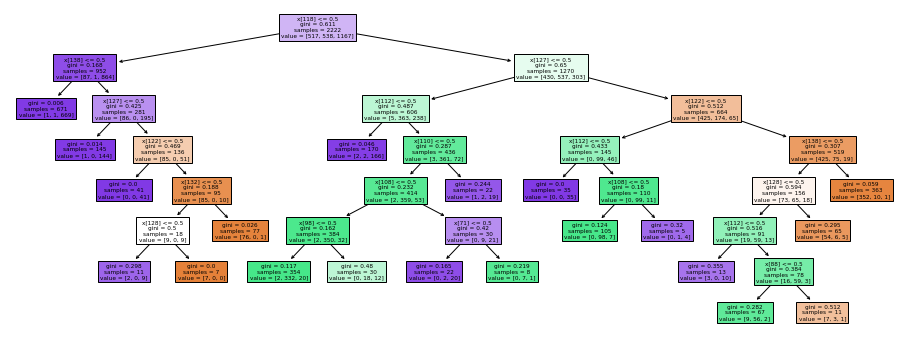

In [73]:
# Plotting the tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt 
plt.figure(figsize = (16,6))
plot_tree(best_dt_model.fit(X_train, y_train) ,filled=True)
plt.show()


### 1.1.3. Decision Tree : Kfold cross validation

In [74]:
# Calculating Kfold score for Decision Tree
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,f1_score
Kfolds = KFold(n_splits=10, random_state=7,shuffle=True)
dt_kfold_score = cross_val_score(best_dt_model, X, Y, cv=Kfolds)
print('Kfolds_Decision Tree accuracy :  ',dt_kfold_score.mean()*100,"%")
confMatrix = confusion_matrix(y_test, y_pred)
# sns.heatmap(confMatrix,annot=True)
print('for Decision Tree, Confusion matrix\n',confMatrix)
report=classification_report(y_test, y_pred)
print('for Decision Tree, Classification Report\n',report)

dt_f1 = f1_score(y_test,y_pred,average='micro')







Kfolds_Decision Tree accuracy :   95.05485784576312 %
for Decision Tree, Confusion matrix
 [[237   4   4]
 [ 14 207   6]
 [  1  18 462]]
for Decision Tree, Classification Report
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       245
           1       0.90      0.91      0.91       227
           2       0.98      0.96      0.97       481

    accuracy                           0.95       953
   macro avg       0.94      0.95      0.94       953
weighted avg       0.95      0.95      0.95       953



## 1.2. Random Forest

### 1.2.1. Random Forest : Hyperparametric Tuning

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
criteria = ["entropy", "gini"] 
max_leaf_nodes_range = [None,2, 5,10]
min_samples_leaf_range = [1,2,3,4] 
min_split_range = [1,2,5,10] 
no_of_trees =[10]
parameters = {"criterion": criteria,
 "min_samples_leaf": min_samples_leaf_range,
 "max_leaf_nodes": max_leaf_nodes_range,
 "min_samples_split": min_split_range,
 "n_estimators": no_of_trees
 }
rf_model = RandomForestClassifier(n_estimators=no_of_trees,
                                  min_samples_split = min_split_range,
                                  criterion=criteria,
                                  max_leaf_nodes= max_leaf_nodes_range,
                                  min_samples_leaf=min_samples_leaf_range,
                                  )
# rf_model = RandomForestClassifier(n_estimators=10)
t_model = GridSearchCV(estimator=rf_model,
                       param_grid = parameters,
                       cv=5,
                       scoring='accuracy',
                       refit=True)

t_model.fit(X_train,y_train)

print("Best accuracy: ", t_model.best_score_)
print("Best Hyperparameters: ",t_model.best_params_)

Best accuracy:  0.9423959914971152
Best Hyperparameters:  {'criterion': 'entropy', 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 10}


### 1.2.2. Random Forest: Training Random Forest With Best Hyperparameters

In [76]:

rf_best = RandomForestClassifier(n_estimators=10,criterion= 'entropy',max_leaf_nodes= None, min_samples_leaf= 2, min_samples_split= 2)
rf_best.fit(X_train, y_train)
Y_pred_rf = rf_best.predict(X_test)
rf_best_acc=round(accuracy_score(y_test,Y_pred_rf)* 100, 2)
random_forest_acc_score = round(rf_best.score(X_train, y_train) * 100, 2)
print("best model accuracy ", rf_best_acc)
print("Best model training accuracy ", random_forest_acc_score)

best model accuracy  93.6
Best model training accuracy  99.41


### 1.2.3. K-fold cross-validation of random forest

In [77]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
Kfolds = KFold(n_splits=10, random_state=7,shuffle=True)
rf_kfold_score = cross_val_score(rf_best, X, Y, cv=Kfolds)
print('Kfolds Random Forest Accuracy : ',rf_kfold_score.mean()*100)
confMatrix = confusion_matrix(y_test, Y_pred_rf)
print('for Random forest, Confusion matrix\n',confMatrix)
report=classification_report(y_test, Y_pred_rf)
print('for Random forest, Classification Report\n',report)
rf_f1 = f1_score(y_test,Y_pred_rf,average='micro')

Kfolds Random Forest Accuracy :  93.63708509414123
for Random forest, Confusion matrix
 [[228   8   9]
 [ 10 202  15]
 [  7  12 462]]
for Random forest, Classification Report
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       245
           1       0.91      0.89      0.90       227
           2       0.95      0.96      0.96       481

    accuracy                           0.94       953
   macro avg       0.93      0.93      0.93       953
weighted avg       0.94      0.94      0.94       953



##  1.3. Naive Bayes Classifier

### 1.3.1. Naive Bayes Classifier : Hyperparametric Tuning (var_smoothing)

In [78]:
var_smoothing=[1e-9,1e-8,1e-7,1e-6]
par_grid = {"var_smoothing": var_smoothing}
nb=GaussianNB()
grid = GridSearchCV(estimator=nb,param_grid=par_grid,cv = 5,scoring='accuracy',refit=True) 
grid.fit(X_train.toarray(), y_train) 
print("Tuned model Accuracy: ", grid.best_score_)
print(grid.best_params_)

Tuned model Accuracy:  0.9338465431723858
{'var_smoothing': 1e-06}


### 1.3.2. Naive Bayes Classifier : Training Naive Bayes Classfier with best Hyperparameters

In [79]:
nb_best_model = GaussianNB(var_smoothing=1e-6)
nb_best_model.fit(X_train.toarray(),y_train)
Y_pred = nb_best_model.predict(X_test.toarray())
nb_best_acc = round(accuracy_score(y_test,Y_pred)*100,2)
gaussian_acc_score = round(nb_best_model.score(X_train.toarray(),y_train)*100,2)
print("Test accuracy of Naive Bayes Classifier ",nb_best_acc,"%")
print("Training accuracy of Naive Bayes Classifier ",gaussian_acc_score,"%")


Test accuracy of Naive Bayes Classifier  94.75 %
Training accuracy of Naive Bayes Classifier  93.83 %


In [80]:
kfolds = KFold(n_splits=10, random_state=7,shuffle=True)
nb_kfold_score = cross_val_score(nb_best_model, X.toarray(), Y, cv=kfolds)
print('Kfolds_Naive Bayes : ',nb_kfold_score.mean()*100,"%")
confusion = confusion_matrix(y_test, Y_pred)
print('for Naive Bayes, Confusion matrix\n',confusion)
classify=classification_report(y_test, Y_pred)
print('for Naive Bayes, Classification Report\n',classify)
nb_f1 = f1_score(y_test,Y_pred,average='micro')

Kfolds_Naive Bayes :  93.60663055770489 %
for Naive Bayes, Confusion matrix
 [[235   9   1]
 [  4 220   3]
 [ 18  15 448]]
for Naive Bayes, Classification Report
               precision    recall  f1-score   support

           0       0.91      0.96      0.94       245
           1       0.90      0.97      0.93       227
           2       0.99      0.93      0.96       481

    accuracy                           0.95       953
   macro avg       0.94      0.95      0.94       953
weighted avg       0.95      0.95      0.95       953



## 1.4. KNN Classifier

### 1.4.1. KNN Classifier : Hyperparametric tuning (choosing the best value of n_neighbours)


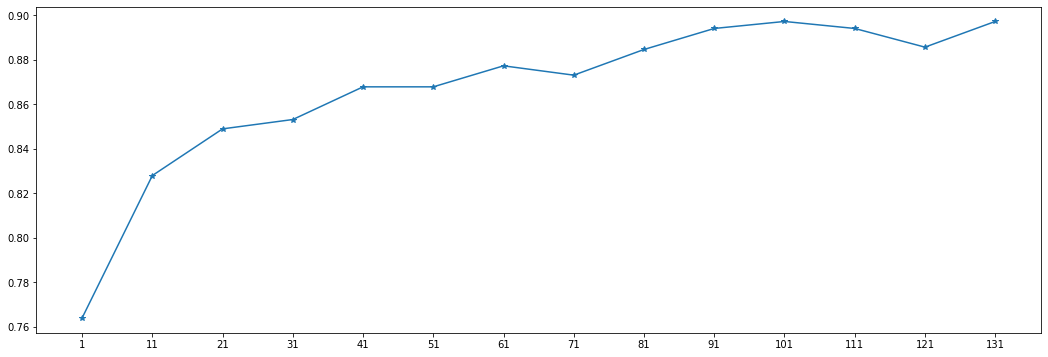

In [84]:
from sklearn.neighbors import KNeighborsClassifier
plt.subplots(figsize=(18,6))

n_index=list(range(1,140,10))
n = pd.Series([],dtype=pd.StringDtype()) 
x=range(1,50)
for i in n_index:
    knn_model=KNeighborsClassifier(n_neighbors=i) 
    knn_model.fit(X_train, y_train) 
    pred=knn_model.predict(X_test)
    n=pd.concat([n,pd.Series(accuracy_score(y_test,pred))])
plt.plot(n_index, n,marker="*")
plt.xticks(n_index)
plt.show()

In [85]:
kNeighbors = KNeighborsClassifier(n_neighbors = 101)
kNeighbors.fit(X_train, y_train)
Y_pred = kNeighbors.predict(X_test) 
knn_best_acc=round(accuracy_score(y_test,Y_pred)* 100, 2)
knn_acc_score = round(kNeighbors.score(X_train, y_train) * 100, 2)
print(knn_best_acc)
print(knn_acc_score)


89.72
91.0


### 1.4.2. KNN Classifier: K-fold Cross validation

In [86]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
kfolds = KFold(n_splits=10, random_state=7,shuffle=True)
knn_kfold_score = cross_val_score(kNeighbors, X, Y, cv=kfolds)
print('Kfolds_KNN accuracy: ',knn_kfold_score.mean()*100,"%")
confusion = confusion_matrix(y_test, Y_pred)

print('for KNN, Confusion Matrix:\n',confusion)
classify=classification_report(y_test, Y_pred)
print('for KNN, Classification Report\n',classify)
knn_f1 = f1_score(y_test,Y_pred,average='micro')

Kfolds_KNN accuracy:  87.62285975041169 %
for KNN, Confusion Matrix:
 [[235   7   3]
 [  6 219   2]
 [ 31  49 401]]
for KNN, Classification Report
               precision    recall  f1-score   support

           0       0.86      0.96      0.91       245
           1       0.80      0.96      0.87       227
           2       0.99      0.83      0.90       481

    accuracy                           0.90       953
   macro avg       0.88      0.92      0.90       953
weighted avg       0.91      0.90      0.90       953



## 1.5. SVM

### 1.5.1. SVM : Hyperparametric Tuning

In [87]:
from sklearn.svm import SVC
param_grid = [
    {'C': [0.5, 1, 10, 100],
     'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
     'kernel': ['rbf']},
]

optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring = 'accuracy',
    verbose= 0
)
optimal_params.fit(X_train,y_train)
print(optimal_params.best_params_)

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


### 1.5.2. SVM : Training the SVM classifier using the best hyperparameters

In [88]:
svm_best_model = SVC(C=10,gamma='scale',kernel='rbf')
svm_best_model.fit(X_train,y_train)
y_pred_opt = np.round(svm_best_model.predict(X_test))
svm_best_acc= round(accuracy_score(y_pred=y_pred_opt,y_true= y_test)*100,2)
print(svm_best_acc)

95.8


### 1.5.3. SVM : K-fold cross-validation

In [89]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
kfolds = KFold(n_splits=10, random_state=7,shuffle=True)
svm_kfold_score = cross_val_score(svm_best_model, X, Y, cv=kfolds)
print('SVM accuracy: ',svm_kfold_score.mean()*100,"%")
confusion = confusion_matrix(y_test, Y_pred)

print('for SVM, Confusion Matrix:\n',confusion)
classify=classification_report(y_test, Y_pred)
print('for SVM, Classification Report\n',classify)
svm_f1 = f1_score(y_test,Y_pred,average='micro')

SVM accuracy:  96.4413824573934 %
for SVM, Confusion Matrix:
 [[235   7   3]
 [  6 219   2]
 [ 31  49 401]]
for SVM, Classification Report
               precision    recall  f1-score   support

           0       0.86      0.96      0.91       245
           1       0.80      0.96      0.87       227
           2       0.99      0.83      0.90       481

    accuracy                           0.90       953
   macro avg       0.88      0.92      0.90       953
weighted avg       0.91      0.90      0.90       953



## 1.6. ANN (Pytorch)

#### Making the ANN Model using pytorch

In [90]:
import torch
##2. Builiding a model
from torch import nn



In [91]:
# Accuracy function
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [92]:
# Coverting the data into tensor
X_train_tensor = torch.from_numpy(X_train.todense()).type(torch.float)
y_train_tensor = torch.from_numpy(y_train).type(torch.long)
X_test_tensor = torch.from_numpy(X_test.todense()).type(torch.float)
y_test_tensor = torch.from_numpy(y_test).type(torch.long)


In [93]:
print((X_train_tensor))

tensor([[1., 0., 0.,  ..., 1., 0., 0.],
        [1., 0., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 1., 0., 0.],
        ...,
        [0., 1., 0.,  ..., 1., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 1.],
        [0., 1., 0.,  ..., 0., 0., 1.]])


### 1.6.1. ANN- Training Loop

In [94]:

in_size = X_train.shape[1]
class ANNmodel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=in_size,out_features=100)
        self.layer_2 = nn.Linear(in_features=100,out_features=100)
        self.layer_3 = nn.Linear(in_features=100,out_features=len(lables))
        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()

    def forward(self,x):
        return (self.layer_3(self.tanh(self.layer_2(self.relu(self.layer_1(x))))))

ann_model = ANNmodel()
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=ann_model.parameters(),
                            lr= 0.05
                            )
## Building and training the model

epochs = 241
torch.manual_seed(42)

for epoch in range(epochs):
    #call train
    ann_model.train()

    # Do the forward pass
    y_logits = ann_model(X_train_tensor).squeeze()
    _,y_pred = torch.max(y_logits.data,1)

    #Calculate the loss/accuracy
    loss = loss_fn(y_logits,
                   y_train_tensor
                   )
    acc = accuracy_fn(y_true=y_train_tensor,
                      y_pred=y_pred)

    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss Backward (backpropagation)
    loss.backward()

    # Optimizer step (gradient descent)
    optimizer.step()

    ### Testing
    ann_model.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = ann_model(X_test_tensor).squeeze()
        _,test_pred = torch.max(test_logits.data,1)

        #2. Calculate test loss/acc
        test_loss = loss_fn(test_logits,y_test_tensor)
        test_acc = accuracy_fn(y_true=y_test_tensor,
                               y_pred = test_pred)

    
    # Print out what's happenin
    if epoch%40== 0:
        print(epoch)
        print("Training Loss",round(float(loss),3), " Train accuracy", acc )
        print("Test Loss: ",round(float(test_loss),3), " Test accuracy:  ",test_acc)

0
Training Loss 1.113  Train accuracy 24.57245724572457
Test Loss:  1.098  Test accuracy:   30.535152151101784
40
Training Loss 0.945  Train accuracy 52.52025202520252
Test Loss:  0.966  Test accuracy:   50.47219307450157
80
Training Loss 0.734  Train accuracy 69.66696669666966
Test Loss:  0.763  Test accuracy:   67.99580272822665
120
Training Loss 0.423  Train accuracy 93.02430243024303
Test Loss:  0.467  Test accuracy:   90.34627492130114
160
Training Loss 0.236  Train accuracy 95.63456345634563
Test Loss:  0.284  Test accuracy:   94.64847848898216
200
Training Loss 0.16  Train accuracy 96.84968496849685
Test Loss:  0.209  Test accuracy:   95.0682056663169
240
Training Loss 0.126  Train accuracy 97.25472547254725
Test Loss:  0.178  Test accuracy:   95.0682056663169


### 1.6.2. ANN : Testing the ANN model

In [95]:
test_logits = ann_model(X_test_tensor).squeeze()
_,test_pred = torch.max(test_logits.data,1)
ann_acc = accuracy_fn(y_true=y_test_tensor,
                               y_pred = test_pred)
print(ann_acc)

ann_f1 = f1_score(y_test_tensor,test_pred,average='micro')

95.0682056663169


### 1.7. Finding the best model for Question 1

#### 1.7.1. Sorting model  according to Kfold Score

In [96]:
best = pd.DataFrame({
 'Model': [ 'KNN','Random Forest','Naive Bayes','Decision Tree','SVM','ANN'],
 'Kfold-Score': [ knn_kfold_score.mean()*100,rf_kfold_score.mean()*100,nb_kfold_score.mean()*100,dt_kfold_score.mean()*100,svm_kfold_score.mean()*100,ann_acc],
 "Accuracy":[knn_best_acc,rf_best_acc,nb_best_acc,dt_best_acc,svm_best_acc,ann_acc]
 })
best_model_kfold = best.sort_values(by='Kfold-Score', ascending=False)
best_model_kfold = best_model_kfold.reset_index(drop=True)
print("By Kfold Score ")
best_model_kfold

By Kfold Score 


,Model,Kfold-Score,Accuracy
0,SVM,96.441382,95.800000
1,ANN,95.068206,95.068206
2,Decision Tree,95.054858,95.070000
3,Random Forest,93.637085,93.600000
4,Naive Bayes,93.606631,94.750000
5,KNN,87.622860,89.720000


#### 1.7.2. Sorting model according to Accuracy

In [97]:
best_model_accuracy = best.sort_values(by='Accuracy', ascending=False)
best_model_accuracy = best_model_accuracy.reset_index(drop=True)
print("By Accuracy ")
best_model_accuracy

By Accuracy 


,Model,Kfold-Score,Accuracy
0,SVM,96.441382,95.800000
1,Decision Tree,95.054858,95.070000
2,ANN,95.068206,95.068206
3,Naive Bayes,93.606631,94.750000
4,Random Forest,93.637085,93.600000
5,KNN,87.622860,89.720000


#### 1.7.3. Plots comparing all the models

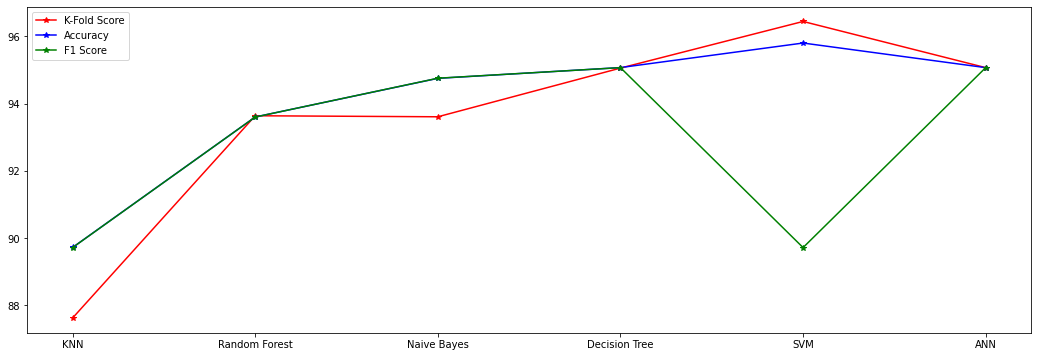

In [98]:
Models = [ 'KNN','Random Forest','Naive Bayes','Decision Tree','SVM','ANN']
KfoldScore = [ knn_kfold_score.mean()*100,rf_kfold_score.mean()*100,nb_kfold_score.mean()*100,dt_kfold_score.mean()*100,svm_kfold_score.mean()*100,ann_acc]
Accuracy = [knn_best_acc,rf_best_acc,nb_best_acc,dt_best_acc,svm_best_acc,ann_acc]
F1Scores = [100*knn_f1,100*rf_f1,100*nb_f1,100*dt_f1,100*svm_f1,100*ann_f1]

plt.subplots(figsize=(18,6))
plt.plot(Models,KfoldScore,color='red',marker='*',label='K-Fold Score')
plt.plot(Models,Accuracy,color='blue',marker='*',label='Accuracy')
plt.plot(Models,F1Scores,color='green',marker='*',label='F1 Score')

plt.legend()
plt.show()

# Q2: MNIST Dataset

In [104]:
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt
mnist = load_digits()
X = mnist.data
y = mnist.target
X_train_mnist, X_test_mnist, y_train_mnist, y_test_mnist = train_test_split(X,y,test_size=0.3,random_state=100)



### 2.1. Decision Tree:  Finding the best decision tree model for mnist

In [105]:
criterion = ["gini", "entropy"] 
max_leaf_nodes = [None,2, 5, 10, 20]
min_sample_leaf = [1,2,3,4] 
max_depth = [None, 2,4,6] 
min_split = [1,2,5,10] 
parameters = {"criterion": criterion,
 "max_depth": max_depth,
 "min_samples_leaf": min_sample_leaf,
 "max_leaf_nodes": max_leaf_nodes,
 "min_samples_split": min_split
 }
decision_tree_model =DecisionTreeClassifier()
t_model = GridSearchCV(estimator=decision_tree_model,param_grid = parameters,cv=5,scoring='accuracy',refit=True)

t_model.fit(X_train_mnist,y_train_mnist)

print("Best accuracy: ", t_model.best_score_)
print("Best Hyperparameters: ",t_model.best_params_)


Best accuracy:  0.8679377727186492
Best Hyperparameters:  {'criterion': 'entropy', 'max_depth': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 5}


### 2.1.2. Decision Tree : Testing on the best model

In [106]:
best_dt_model_mnist = DecisionTreeClassifier(criterion="entropy",max_depth=None,max_leaf_nodes=None,min_samples_leaf=1,min_samples_split=5)
best_dt_model_mnist.fit(X_train_mnist,y_train_mnist)
y_pred_mnist = best_dt_model_mnist.predict(X_test_mnist)
dt_best_acc = round(accuracy_score(y_test_mnist,y_pred_mnist)*100,2)
best_model_train_acc = round(best_dt_model_mnist.score(X_train_mnist,y_train_mnist)*100,2)
confMatrix = confusion_matrix(y_test_mnist, y_pred_mnist)
print('for Decision Tree,Train Accuracy',best_model_train_acc)
print('for Decision Tree,Test Accuracy',dt_best_acc)
print('for Decision Tree, Confusion matrix\n',confMatrix)
report=classification_report(y_test_mnist, y_pred_mnist)
print('for Decision Tree, Classification Report\n',report)

dt_f1 = f1_score(y_test_mnist,y_pred_mnist,average='micro')

for Decision Tree,Train Accuracy 97.61
for Decision Tree,Test Accuracy 85.56
for Decision Tree, Confusion matrix
 [[54  0  0  0  3  0  1  0  1  0]
 [ 0 41  2  0  1  0  0  3  2  1]
 [ 2  1 51  4  0  0  0  0  2  0]
 [ 0  0  3 40  0  3  0  3  0  0]
 [ 3  0  0  0 49  1  3  3  0  0]
 [ 0  0  0  0  1 50  1  1  0  1]
 [ 1  0  0  1  2  0 52  0  2  0]
 [ 0  3  0  0  1  1  0 43  1  1]
 [ 0  0  0  0  0  3  0  2 42  1]
 [ 0  5  0  2  4  1  0  1  0 40]]
for Decision Tree, Classification Report
               precision    recall  f1-score   support

           0       0.90      0.92      0.91        59
           1       0.82      0.82      0.82        50
           2       0.91      0.85      0.88        60
           3       0.85      0.82      0.83        49
           4       0.80      0.83      0.82        59
           5       0.85      0.93      0.88        54
           6       0.91      0.90      0.90        58
           7       0.77      0.86      0.81        50
           8       0.84   

### 2.1.3. Decision Tree : Kfold cross validation

In [107]:
from sklearn.model_selection import KFold,cross_val_score
kfolds = KFold(n_splits=10, random_state=7,shuffle=True)
dt_kfold_score = cross_val_score(best_dt_model_mnist, X, y, cv=kfolds)
print("K-Fold score for Decision Tree MNIST= ",dt_kfold_score.mean()*100,"%")

K-Fold score for Decision Tree MNIST=  86.7042209807573 %


#### Some examples how the model is predicting

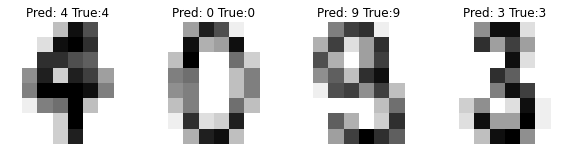

In [108]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for axe, image, prediction,true_label in zip(axes, X_test_mnist[100:], y_pred_mnist[100:],y_test_mnist[100:]):
    axe.set_axis_off()
    image = image.reshape(8, 8)
    axe.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    axe.set_title(f"Pred: {prediction} True:{true_label}")

## 2.2. Random forest model for MNIST
### 2.2.1. Random Forest:  Hyperparametric tuning


In [109]:
criteria = ["entropy", "gini"] 
max_leaf_nodes_range = [None,2, 5,10]
min_samples_leaf_range = [1,2,3,4] 
min_split_range = [1,2,5,10] 
no_of_trees =[10]
parameters = {"criterion": criteria,
 "min_samples_leaf": min_samples_leaf_range,
 "max_leaf_nodes": max_leaf_nodes_range,
 "min_samples_split": min_split_range,
 "n_estimators": no_of_trees
 }
rf_model = RandomForestClassifier(n_estimators=no_of_trees,
                                  min_samples_split = min_split_range,
                                  criterion=criteria,
                                  max_leaf_nodes= max_leaf_nodes_range,
                                  min_samples_leaf=min_samples_leaf_range,
                                  )
# rf_model = RandomForestClassifier(n_estimators=10)
t_model = GridSearchCV(estimator=rf_model,
                       param_grid = parameters,
                       cv=5,
                       scoring='accuracy',
                       refit=True)

t_model.fit(X_train_mnist,y_train_mnist)

print("Best accuracy: ", t_model.best_score_)
print("Best Hyperparameters: ",t_model.best_params_)

Best accuracy:  0.9467052425219755
Best Hyperparameters:  {'criterion': 'gini', 'max_leaf_nodes': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 10}


In [125]:

rf_best = RandomForestClassifier(n_estimators=10,criterion= 'gini',max_leaf_nodes= None, min_samples_leaf= 3, min_samples_split= 2)
rf_best.fit(X_train_mnist, y_train_mnist)
Y_pred_rf_mnist = rf_best.predict(X_test_mnist)
rf_best_acc=round(accuracy_score(y_test_mnist,Y_pred_rf_mnist)* 100, 2)
random_forest_acc_score = round(rf_best.score(X_train_mnist, y_train_mnist) * 100, 2)
confMatrix = confusion_matrix(y_test_mnist, Y_pred_rf_mnist)

print('for Decision Tree,Train Accuracy',random_forest_acc_score)
print('for Decision Tree,Test Accuracy',rf_best_acc)

print('for Random forest, Confusion matrix\n',confMatrix)
report=classification_report(y_test_mnist, Y_pred_rf_mnist)
print('for Random forest, Classification Report\n',report)

rf_f1 = f1_score(y_test_mnist,Y_pred_rf_mnist,average='micro')

for Decision Tree,Train Accuracy 99.28
for Decision Tree,Test Accuracy 92.22
for Random forest, Confusion matrix
 [[58  0  0  0  1  0  0  0  0  0]
 [ 0 46  1  0  0  1  0  0  1  1]
 [ 1  1 52  1  0  0  0  1  3  1]
 [ 0  0  0 46  0  1  0  1  1  0]
 [ 0  1  0  0 56  0  0  1  1  0]
 [ 0  0  0  1  0 52  1  0  0  0]
 [ 1  0  0  0  2  0 54  0  1  0]
 [ 0  0  0  0  1  0  0 49  0  0]
 [ 0  4  1  2  0  1  0  1 39  0]
 [ 1  0  0  0  0  0  0  4  2 46]]
for Random forest, Classification Report
               precision    recall  f1-score   support

           0       0.95      0.98      0.97        59
           1       0.88      0.92      0.90        50
           2       0.96      0.87      0.91        60
           3       0.92      0.94      0.93        49
           4       0.93      0.95      0.94        59
           5       0.95      0.96      0.95        54
           6       0.98      0.93      0.96        58
           7       0.86      0.98      0.92        50
           8       0.81   

### 2.2.2. Random Forest: Kfold cross validation

In [126]:
kfolds = KFold(n_splits=10, random_state=7,shuffle=True)
rf_mnist_kfold_score = cross_val_score(rf_best, X, y, cv=kfolds)
print("K-Fold score for Random Forest for MNIST= ",rf_mnist_kfold_score.mean()*100,"%")

K-Fold score for Random Forest for MNIST=  94.32402234636872 %


## 2.3. Naive Bayes for MNIST
### 2.3.1. Hyperparametric tuning

In [127]:
var_smoothing=[1e-9,1e-8,1e-7,1e-6]
par_grid = {"var_smoothing": var_smoothing}
nb=GaussianNB()
grid = GridSearchCV(estimator=nb,param_grid=par_grid,cv = 5,scoring='accuracy',refit=True) 
grid.fit(X_train_mnist, y_train_mnist) 
print("Tuned model Accuracy For Naive Bayes: ", grid.best_score_)
print(grid.best_params_)

Tuned model Accuracy For Naive Bayes:  0.8679314488079429
{'var_smoothing': 1e-06}


In [128]:
nb_best_model = GaussianNB(var_smoothing=1e-6)
nb_best_model.fit(X_train_mnist,y_train_mnist)
y_pred_mnist = nb_best_model.predict(X_test_mnist)
nb_best_acc = round(accuracy_score(y_test_mnist,y_pred_mnist)*100,2)
gaussian_acc_score = round(nb_best_model.score(X_train_mnist,y_train_mnist)*100,2)
print("Test accuracy of Naive Bayes Classifier ",nb_best_acc,"%")
print("Training accuracy of Naive Bayes Classifier ",gaussian_acc_score,"%")
confusion = confusion_matrix(y_test_mnist, y_pred_mnist)
print('for Naive Bayes, Confusion matrix\n',confusion)
classify=classification_report(y_test_mnist, y_pred_mnist)
print('for Naive Bayes, Classification Report\n',classify)
nb_f1 = f1_score(y_test_mnist,y_pred_mnist,average='micro')

Test accuracy of Naive Bayes Classifier  87.41 %
Training accuracy of Naive Bayes Classifier  89.58 %
for Naive Bayes, Confusion matrix
 [[57  0  0  0  0  0  0  1  0  1]
 [ 0 42  2  0  0  0  2  0  4  0]
 [ 0  8 44  0  0  0  0  0  8  0]
 [ 0  0  1 41  0  0  0  4  2  1]
 [ 0  1  0  0 53  0  0  3  2  0]
 [ 0  2  0  1  0 48  1  1  0  1]
 [ 0  2  0  0  0  2 54  0  0  0]
 [ 0  0  0  0  1  0  0 49  0  0]
 [ 0  3  0  1  0  2  0  0 42  0]
 [ 0  3  1  0  1  1  0  3  2 42]]
for Naive Bayes, Classification Report
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        59
           1       0.69      0.84      0.76        50
           2       0.92      0.73      0.81        60
           3       0.95      0.84      0.89        49
           4       0.96      0.90      0.93        59
           5       0.91      0.89      0.90        54
           6       0.95      0.93      0.94        58
           7       0.80      0.98      0.88        50
     

In [129]:
kfolds = KFold(n_splits=10, random_state=7,shuffle=True)
nb_kfold_score = cross_val_score(nb_best_model, X, y, cv=kfolds)
print("K-Fold score for Naive Bayes for MNIST= ",nb_kfold_score.mean()*100,"%")

K-Fold score for Naive Bayes for MNIST=  88.20266914959653 %


## 2.4. KNN classifier for MNIST

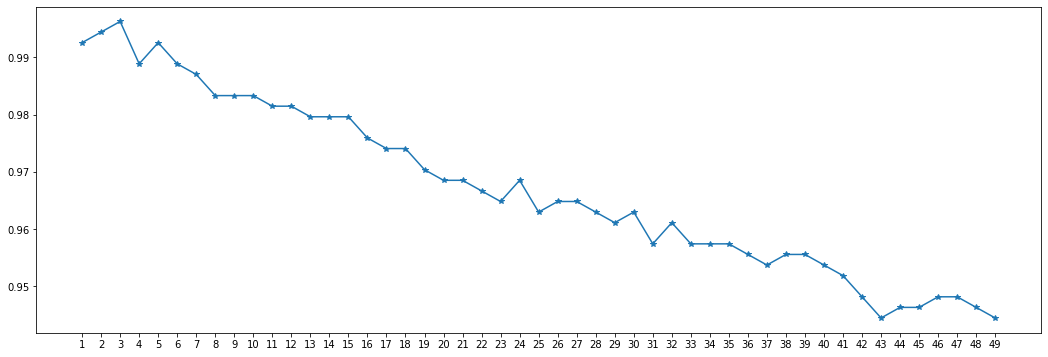

In [133]:
from sklearn.neighbors import KNeighborsClassifier
plt.subplots(figsize=(18,6))

n_index=list(range(1,50))
n = pd.Series([],dtype=pd.StringDtype()) 
x=range(1,50)
for i in list(range(1,50)):
    knn_model=KNeighborsClassifier(n_neighbors=i) 
    knn_model.fit(X_train_mnist, y_train_mnist) 
    pred=knn_model.predict(X_test_mnist)
    n=pd.concat([n,pd.Series(accuracy_score(y_test_mnist,pred))])
plt.plot(n_index, n,marker="*")
plt.xticks(x)
plt.show()

In [134]:
kNeighbors = KNeighborsClassifier(n_neighbors = 3)
kNeighbors.fit(X_train_mnist, y_train_mnist)
y_pred_mnist = kNeighbors.predict(X_test_mnist) 
knn_best_acc=round(accuracy_score(y_test_mnist,y_pred_mnist)* 100, 2)
knn_acc_score = round(kNeighbors.score(X_train_mnist, y_train_mnist) * 100, 2)
print("Test accuracy", knn_best_acc)
print("Training accuracy", knn_acc_score)
confusion = confusion_matrix(y_test_mnist, y_pred_mnist)

print('for KNN, Confusion Matrix:\n',confusion)
classify=classification_report(y_test_mnist, y_pred_mnist)
print('for KNN, Classification Report\n',classify)

knn_f1 = f1_score(y_test_mnist,y_pred_mnist,average='micro')


Test accuracy 99.63
Training accuracy 99.12
for KNN, Confusion Matrix:
 [[59  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 60  0  0  0  0  0  0  0]
 [ 0  0  0 49  0  0  0  0  0  0]
 [ 0  0  0  0 59  0  0  0  0  0]
 [ 0  0  0  0  0 54  0  0  0  0]
 [ 0  0  0  0  0  0 57  0  1  0]
 [ 0  0  0  0  0  0  0 50  0  0]
 [ 0  1  0  0  0  0  0  0 47  0]
 [ 0  0  0  0  0  0  0  0  0 53]]
for KNN, Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       0.98      1.00      0.99        50
           2       1.00      1.00      1.00        60
           3       1.00      1.00      1.00        49
           4       1.00      1.00      1.00        59
           5       1.00      1.00      1.00        54
           6       1.00      0.98      0.99        58
           7       1.00      1.00      1.00        50
           8       0.98      0.98      0.98        48
           9       1.00 

In [135]:
kfolds = KFold(n_splits=10, random_state=7,shuffle=True)
KNN_kfold_score = cross_val_score(kNeighbors, X, y, cv=kfolds)
print("K-Fold score for KNN for MNIST= ",KNN_kfold_score.mean()*100,"%")

K-Fold score for KNN for MNIST=  99.05400372439479 %


## 2.5. SVM for MNIST

 Hyperparametric Tuning

In [136]:
from sklearn.svm import SVC
param_grid = [
    {'C': [0.5, 1, 10, 100],
     'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
     'kernel': ['rbf']},
]

optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring = 'accuracy',
    verbose= 0
)
optimal_params.fit(X_train_mnist,y_train_mnist)
print(optimal_params.best_params_)

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [137]:
svm_best_model = SVC(C=10,gamma='scale',kernel='rbf')
svm_best_model.fit(X_train_mnist,y_train_mnist)
y_pred_mnist = np.round(svm_best_model.predict(X_test_mnist))
svm_best_acc= round(accuracy_score(y_pred=y_pred_mnist,y_true= y_test_mnist)*100,2)
print(svm_best_acc)
confusion = confusion_matrix(y_test_mnist, y_pred_mnist)

print('for KNN, Confusion Matrix:\n',confusion)
classify=classification_report(y_test_mnist, y_pred_mnist)
print('for KNN, Classification Report\n',classify)

svm_f1 = f1_score(y_test_mnist,y_pred_mnist,average='micro')

99.44
for KNN, Confusion Matrix:
 [[59  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 60  0  0  0  0  0  0  0]
 [ 0  0  0 49  0  0  0  0  0  0]
 [ 0  0  0  0 59  0  0  0  0  0]
 [ 0  0  0  0  0 53  1  0  0  0]
 [ 0  0  0  0  0  0 57  0  1  0]
 [ 0  0  0  0  0  0  0 50  0  0]
 [ 0  0  0  0  0  0  0  0 47  1]
 [ 0  0  0  0  0  0  0  0  0 53]]
for KNN, Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        60
           3       1.00      1.00      1.00        49
           4       1.00      1.00      1.00        59
           5       1.00      0.98      0.99        54
           6       0.98      0.98      0.98        58
           7       1.00      1.00      1.00        50
           8       0.98      0.98      0.98        48
           9       0.98      1.00      0.99        53

    acc

In [138]:
kfolds = KFold(n_splits=10, random_state=7,shuffle=True)
svm_kfold_score = cross_val_score(svm_best_model, X, y, cv=kfolds)
print("K-Fold score for Decision Tree MNIST= ",svm_kfold_score.mean()*100,"%")

K-Fold score for Decision Tree MNIST=  99.2203600248293 %


## 2.6. ANN for the MNIST

In [139]:
# Coverting the data into tensor
X_train_tensor_mnist = torch.from_numpy(X_train_mnist).type(torch.float)
y_train_tensor_mnist = torch.from_numpy(y_train_mnist).type(torch.long)
X_test_tensor_mnist = torch.from_numpy(X_test_mnist).type(torch.float)
y_test_tensor_mnist = torch.from_numpy(y_test_mnist).type(torch.long)

In [140]:
in_size = X_train_mnist.shape[1]
class ANNmodelforMNIST(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=in_size,out_features=10)
        self.layer_2 = nn.Linear(in_features=10,out_features=10)
        self.layer_3 = nn.Linear(in_features=10,out_features=10)
        self.relu = nn.ReLU()

    def forward(self,x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

ann_mnist_model = ANNmodelforMNIST()
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=ann_mnist_model.parameters(),
                            lr= 0.005
                            )
## Building and training the model

epochs = 5000
torch.manual_seed(42)

for epoch in range(epochs):
    #call train
    ann_mnist_model.train()

    # Do the forward pass
    y_logits = ann_mnist_model(X_train_tensor_mnist).squeeze()
    _,y_pred = torch.max(y_logits.data,1)

    #Calculate the loss/accuracy
    loss = loss_fn(y_logits,
                   y_train_tensor_mnist
                   )
    acc = accuracy_fn(y_true=y_train_tensor_mnist,
                      y_pred=y_pred)

    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss Backward (backpropagation)
    loss.backward()

    # Optimizer step (gradient descent)
    optimizer.step()

    ### Testing
    ann_mnist_model.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = ann_mnist_model(X_test_tensor_mnist).squeeze()
        _,test_pred = torch.max(test_logits.data,1)

        #2. Calculate test loss/acc
        test_loss = loss_fn(test_logits,y_test_tensor_mnist)
        test_acc = accuracy_fn(y_true=y_test_tensor_mnist,
                               y_pred = test_pred)

    
    # Print out what's happening 
    
    if epoch%1000== 0:
        print(epoch)
        print("Training Loss",round(float(loss),3), " Train accuracy", acc )
        print("Test Loss: ",round(float(test_loss),3), " Test accuracy:  ",test_acc)


0
Training Loss 2.339  Train accuracy 9.228321400159109
Test Loss:  2.332  Test accuracy:   10.555555555555555
1000
Training Loss 0.246  Train accuracy 92.91964996022276
Test Loss:  0.259  Test accuracy:   92.4074074074074
2000
Training Loss 0.118  Train accuracy 97.3747016706444
Test Loss:  0.178  Test accuracy:   94.44444444444444
3000
Training Loss 0.078  Train accuracy 98.4884645982498
Test Loss:  0.164  Test accuracy:   95.37037037037037
4000
Training Loss 0.057  Train accuracy 99.0453460620525
Test Loss:  0.159  Test accuracy:   95.55555555555556


In [141]:
# Testing the ANN Model
test_logits = ann_mnist_model(X_test_tensor_mnist).squeeze()
_,y_pred_mnist = torch.max(test_logits.data,1)
ann_acc = accuracy_fn(y_true=y_test_tensor_mnist,
                               y_pred = y_pred_mnist)
print(ann_acc)
confusion = confusion_matrix(y_test_mnist, y_pred_mnist)

print('for ANN, Confusion Matrix:\n',confusion)
classify=classification_report(y_test_mnist, y_pred_mnist)
print('for ANN, Classification Report\n',classify)

ann_f1 = f1_score(y_test_mnist,y_pred_mnist,average='micro')

95.55555555555556
for ANN, Confusion Matrix:
 [[57  0  0  0  1  0  0  1  0  0]
 [ 0 46  0  0  0  0  2  0  1  1]
 [ 0  0 59  0  0  0  0  0  1  0]
 [ 0  0  0 48  0  0  0  0  0  1]
 [ 0  1  0  0 56  0  0  2  0  0]
 [ 0  0  0  0  0 54  0  0  0  0]
 [ 0  0  0  0  0  0 58  0  0  0]
 [ 0  0  0  0  1  0  0 47  1  1]
 [ 0  1  0  0  0  2  0  1 42  2]
 [ 0  0  0  3  0  0  0  1  0 49]]
for ANN, Classification Report
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        59
           1       0.96      0.92      0.94        50
           2       1.00      0.98      0.99        60
           3       0.94      0.98      0.96        49
           4       0.97      0.95      0.96        59
           5       0.96      1.00      0.98        54
           6       0.97      1.00      0.98        58
           7       0.90      0.94      0.92        50
           8       0.93      0.88      0.90        48
           9       0.91      0.92      0.92       

## Comparing the models of MNIST dataset

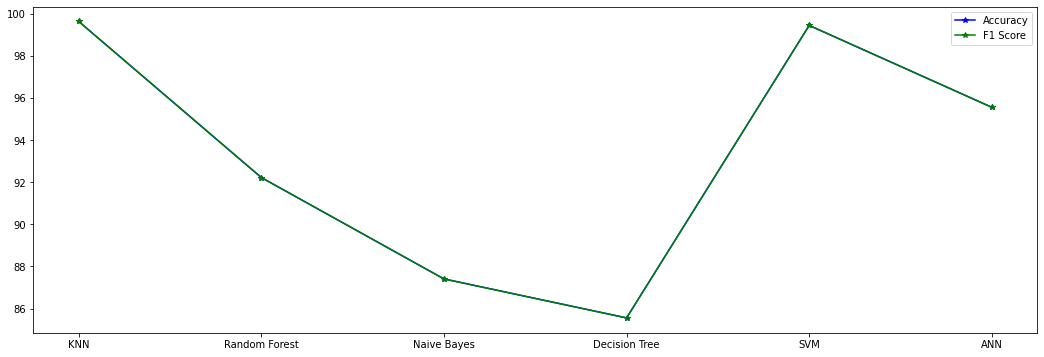

In [142]:
Models = [ 'KNN','Random Forest','Naive Bayes','Decision Tree','SVM','ANN']
Accuracy = [knn_best_acc,rf_best_acc,nb_best_acc,dt_best_acc,svm_best_acc,ann_acc]
F1Scores = [100*knn_f1,100*rf_f1,100*nb_f1,100*dt_f1,100*svm_f1,100*ann_f1]

plt.subplots(figsize=(18,6))
plt.plot(Models,Accuracy,color='blue',marker='*',label='Accuracy')
plt.plot(Models,F1Scores,color='green',marker='*',label='F1 Score')

plt.legend()
plt.show()

Best models for MNIST are:
#### KNN - Accuracy=99.63% , Kfold= 99.05%
#### SVM - Accuracy=99.44% , Kfold= 99.22%